Zadanie 1.

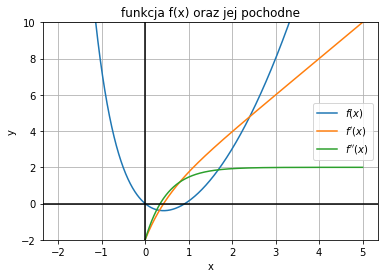

In [26]:
import math
import numpy
import matplotlib.pyplot as plt
STOP = 10**-10
MAXITER=100
def fx(x):
    return(pow(math.e,-2*x)+x**2-1)
    
def dfx(x):
    return(-2*pow(math.e,-2*x)+2*x)
def d2fx(x):
    return(-4*pow(math.e,-2*x)+2)
    
    
x = numpy.linspace(-2,5,5000)
y = [fx(i) for i in x]
dy = [dfx(i) for i in x]
d2y = [d2fx(i) for i in x]

plt.figure()
plt.plot(x,y,label='$f(x)$')
plt.plot(x,dy,label='$f\'(x)$')
plt.plot(x,d2y,label='$f\'\'(x)$')
plt.grid()
plt.ylim(-2,10)
plt.title('funkcja f(x) oraz jej pochodne')
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Szacunkowe punkty zerowe funkcji f(x): x=0,x=1
Przedziały dla metod bisekcji i siecznych: [-0.2,0.4], [0.5,1.0]
Punkty startowe dla metody stycznych: -0.2, 0.5

Zadanie 2.

In [27]:
def bisection(fx,a,b,accur,maxit):
    i=0
    while(i<maxit and abs(b-a)>accur):
        i+=1
        c = (a+b)/2.0
        if (fx(c)*fx(a) < 0):
            b = c
        else:
            a = c
    return c,i

In [28]:
print (bisection(fx,-0.2,0.4,STOP,MAXITER))
print (bisection(fx,0.5,1.0,STOP,MAXITER))

(2.3283064365386964e-11, 33)
(0.9165625831228681, 33)


Warunki wystarczające zbieżności metody bisekcji w przedziale [a,b]:
Funkcja f(x) jest ciągła w przedziale dokniętym [a,b].
Funkcja przyjmuje różne znaki na końcach przedziału (czyli zachodzi f(a)*f(b) < 0).

In [36]:
import time
import scipy.optimize as scp
print("pierwiastek w okolicy 0: ")
current = time.time()
mybisection = bisection(fx,-0.2,0.4,STOP,MAXITER)
print("mybisection :",time.time()-current)
current = time.time()
importbisection = scp.bisect(fx,-0.2,0.4,xtol=STOP,maxiter=MAXITER)
print("scipybisection :",time.time()-current)
print("pierwiastek w okolicy 0,9: ")
current = time.time()
mybisection = bisection(fx,0.5,1.0,STOP,MAXITER)
print("mybisection :",time.time()-current)
current = time.time()
importbisection = scp.bisect(fx,0.5,1.0,xtol=STOP,maxiter=MAXITER)
print("scipybisection :",time.time()-current)

pierwiastek w okolicy 0: 
mybisection : 0.0002968311309814453
scipybisection : 0.00023746490478515625
pierwiastek w okolicy 0,9: 
mybisection : 0.0003266334533691406
scipybisection : 0.00022482872009277344


Zadanie 3.

In [30]:
def NR(fx,dfx,a,accur,maxit):
    xa=a
    xb=xa-(fx(xa)/dfx(xa))
    i=0
    while maxit>i and abs(xa-xb)>accur:
        i+=1
        xa=xb
        xb=xa-fx(xa)/dfx(xa)
    return xb,i

In [31]:
print (NR(fx,dfx,-0.2,STOP,MAXITER))
print (NR(fx,dfx,0.5,STOP,MAXITER))

(1.513707656052328e-17, 5)
(0.916562583105698, 6)


Warunki wystarczające zbieżności metody stycznych dla ustalonego punktu startowego:
1.Funkcja jest ciągła w przedziale domkniętym [a,b];
2.Pierwsza i druga pochodna funkcji f(x) istnieją i są ciągłe w przedziale domkniętym [a,b].")
3.Na końcach przedziału [a,b] wartości funkcji f(x) przyjmują przeciwne znaki (czyli zachodzi f(a)*f(b) < 0).
4.Pierwsza i druga pochodna mają stały znak w całym przedziale [a,b] (w przedziale nie ma ekstremów lokalnych  i punktów przegięcia).
5.W punkcie startowym funkcja f(x) przyjmuje ten sam znak co jej druga pochodna (czyli zachodzi f(x0)*f''(x0)>0)

In [37]:
print("pierwiastek w okolicy 0: ")
current = time.time()
myNR = NR(fx,dfx,-0.2,STOP,MAXITER)
print("myNR :",time.time()-current)
current = time.time()
importNR = scp.newton(fx,-0.2,fprime=dfx,tol=STOP,maxiter=MAXITER)
print("scipyNR :",time.time()-current)
print("pierwiastek w okolicy 0,9: ")
current = time.time()
myNR = NR(fx,dfx,0.5,STOP,MAXITER)
print("myNR :",time.time()-current)
current = time.time()
importNR = scp.newton(fx,0.5,fprime=dfx,tol=STOP,maxiter=MAXITER)
print("scipyNR :",time.time()-current)

pierwiastek w okolicy 0: 
myNR : 0.000202178955078125
scipyNR : 0.0002079010009765625
pierwiastek w okolicy 0,9: 
myNR : 0.0001685619354248047
scipyNR : 0.00019979476928710938


Zadanie 4.

In [38]:
def secant(fx,a,b,accur,maxit):
    xa = a
    xb = a - fx(a)*(b-a)/(fx(b)-fx(a))
    i=0
    while i<maxit and abs(xb-xa)>accur:
        i+=1
        tmp=xb
        xb = xa - fx(xa)*(tmp-xa)/(fx(tmp)-fx(xa))
        xa=tmp
    return xb,i

In [39]:
print (secant(fx,-0.2,0.4,STOP,MAXITER))
print (secant(fx,0.5,1.0,STOP,MAXITER))

(2.4552257482151985e-17, 7)
(0.916562583105698, 6)


Warunki wystarczające zbieżności metody siecznych w przedziale [a,b]:
1.Funkcja jest ciągła w przedziale domkniętym [a,b];
2.Pierwsza i druga pochodna funkcji f(x) istnieją i są ciągłe w przedziale domkniętym [a,b].
3.Na końcach przedziału [a,b] wartości funkcji f(x) przyjmują przeciwne znaki (czyli zachodzi f(a)*f(b) < 0). 
4.Pierwsza i druga pochodna mają stały znak w całym przedziale [a,b] (w przedziale nie ma ekstremów lokalnych i punktów przegięcia).


In [40]:
print("pierwiastek w okolicy 0: ")
current = time.time()
mysecant = secant(fx,-0.2,0.4,STOP,MAXITER)
print("mysecant :",time.time()-current)
current = time.time()
importsecant = scp.newton(fx,-0.2,tol=STOP,maxiter=MAXITER)
print("scipysecant :",time.time()-current)
print("pierwiastek w okolicy 0,9: ")
current = time.time()
mysecant = secant(fx,0.5,1.0,STOP,MAXITER)
print("mysecant :",time.time()-current)
current = time.time()
importNR = scp.newton(fx,0.5,tol=STOP,maxiter=MAXITER)
print("scipysecant :",time.time()-current)

pierwiastek w okolicy 0: 
mysecant : 7.009506225585938e-05
scipysecant : 6.437301635742188e-05
pierwiastek w okolicy 0,9: 
mysecant : 5.4836273193359375e-05
scipysecant : 7.152557373046875e-05


Najszybsza z testowanych metod okazala sie metoda Newtona-Raphsona(stycznych) znajdujac pierwiastki w odpowiednio 5 i 6 iteracjach, lekko wolniejsza byla metoda stycznych: 7 i 6 iteracji, a najwolniejsza metoda bisekcji:33 i 33 iteracje.